## Benchmarking results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def get_df(filename):
    df = pd.read_csv(filename)
    df = df[df['data_size'] == 1073741824]
    return df

def total_time(filename):
    df = get_df(filename)
    total_df = df[['scan time', 'execute_query time']].sum(axis=0)
    scan_min = round(total_df['scan time'] / (60 * 1000), 2)
    execute_query_min = round(total_df['execute_query time'] / (60 * 1000), 2)
    total_min = scan_min + execute_query_min
    print('Scan time: {} min, ExecuteQuery: {} min, Total: {} min'.format(scan_min, execute_query_min, total_min))
    
def survey(filename):
    df = get_df(filename)
    df_mean = df.groupby(['data_size', 'block_size', 'upper_bound','scan thread number', ' execute_query thread number']).mean()
    return df_mean

In [56]:
print('RoundRobin survey:')
total_time('log_round_robin.csv')
print('OneDisk survey:')
total_time('log_one_disk.csv')

RoundRobin survey:
Scan time: 14.84 min, ExecuteQuery: 43.46 min, Total: 58.3 min
OneDisk survey:
Scan time: 99.29 min, ExecuteQuery: 79.33 min, Total: 178.62 min


In [21]:
survey('log_round_robin.csv')

scan time  \
data_size  block_size upper_bound scan thread number  execute_query thread number              
1073741824 512        22          1                  1                             22647.750   
                                  2                  2                             11420.250   
                                  4                  4                              5974.875   
                                  8                  8                              3646.250   
                                  16                 16                             7639.375   
           1024       22          1                  1                             11783.750   
                                  2                  2                              5992.250   
                                  4                  4                              3177.750   
                                  8                  8                              2275.000   
                                  16                 16                             4418.250   
           2048       22          1                  1                              6690.500   
                                  2                  2                              3428.500   
                                  4                  4                              1907.750   
                                  8                  8                              1118.375   
                                  16                 16                             2261.250   
           4096       22          1                  1                              4545.250   
                                  2                  2                              2150.875   
                                  4                  4                              1174.500   
                                  8                  8                              1407.000   
                                  16                 16                             1198.125   
           8192       22          1                  1                              2993.000   
                                  2                  2                              1353.500   
                                  4                  4                               803.250   
                                  8                  8                               637.500   
                                  16                 16                              685.125   

                                                                                   execute_query time  
data_size  block_size upper_bound scan thread number  execute_query thread number                      
1073741824 512        22          1                  1                                      70230.875  
                                  2                  2                                      46949.000  
                                  4                  4                                      24285.375  
                                  8                  8                                      13281.750  
                                  16                 16                                      6932.625  
           1024       22          1                  1                                      38250.875  
                                  2                  2                                      23688.625  
                                  4                  4                                      12223.125  
                                  8                  8                                       6657.750  
                                  16                 16                                      3523.625  
           2048       22          1                  1                                      19285.000  
                                  2                  2                                      12165.500  
                                  

In [58]:
survey('log_one_disk.csv')

scan time  \
data_size  block_size upper_bound scan thread number  execute_query thread number               
1073741824 512        22          1                  1                             193072.750   
                                  2                  2                              97029.000   
                                  4                  4                              49002.750   
                                  8                  8                              25188.000   
                                  16                 16                             13758.625   
           1024       22          1                  1                              97216.625   
                                  2                  2                              48838.500   
                                  4                  4                              24842.875   
                                  8                  8                              12812.875   
                                  16                 16                              6988.625   
           2048       22          1                  1                              48921.000   
                                  2                  2                              24631.750   
                                  4                  4                              12459.625   
                                  8                  8                               6389.500   
                                  16                 16                              3456.750   
           4096       22          1                  1                              25930.125   
                                  2                  2                              13082.375   
                                  4                  4                               6613.375   
                                  8                  8                               3356.625   
                                  16                 16                              1786.875   
           8192       22          1                  1                              14960.375   
                                  2                  2                               7549.000   
                                  4                  4                               3829.750   
                                  8                  8                               1927.625   
                                  16                 16                              1037.875   

                                                                                   execute_query time  
data_size  block_size upper_bound scan thread number  execute_query thread number                      
1073741824 512        22          1                  1                                     150354.750  
                                  2                  2                                      77947.750  
                                  4                  4                                      39204.375  
                                  8                  8                                      19944.375  
                                  16                 16                                     10832.125  
           1024       22          1                  1                                      77081.375  
                                  2                  2                                      39203.250  
                                  4                  4                                      19975.250  
                                  8                  8                                      10267.375  
                                  16                 16                                      5509.750  
           2048       22          1                  1                                      40413.750  
                                  2                  2                                      20330.500  
        

In [52]:
def setup_axes(ax, xlabel, ylabel):
    for i in range(len(ax)):
        ax[i].legend()
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].set_xlabel(xlabel, fontsize=12)
        ax[i].set_ylabel(ylabel, fontsize=12)
        
def main_info(filename):
    df = get_df(filename)
    
    df_main = df[['block_size', 'scan thread number', 'scan time', 'execute_query time']]
    df_grouped = df_main.groupby(['block_size', 'scan thread number']).mean()

    block_sizes = []
    thread_numbers = []
    index_list = df_grouped.index.values.tolist()

    for block_size, thread_number in index_list:
        if block_size not in block_sizes:
            block_sizes.append(block_size)
        if thread_number not in thread_numbers:
            thread_numbers.append(thread_number)
            
    return df, df_main, block_sizes, thread_numbers
    
def block_size_to_time_relation(filename):
    df, df_main, block_sizes, thread_numbers = main_info(filename)   

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    for thread_number in thread_numbers:
        df_bs = df_main[df_main['scan thread number'] == thread_number].groupby('block_size').mean()
        ax[0].plot(df_bs['scan time'], label='{} threads'.format(thread_number))
        ax[1].plot(df_bs['execute_query time'], label='{} threads'.format(thread_number))

    setup_axes(ax, 'block size', 'time, ms')
    ax[0].set_xticks(block_sizes)
    ax[0].set_xticklabels([str(block_size) for block_size in block_sizes])
    ax[1].set_xticks(block_sizes)
    ax[1].set_xticklabels([str(block_size) for block_size in block_sizes])
    ax[0].set_title('Scan time', fontsize=16)
    ax[1].set_title('ExecuteQuery time', fontsize=16)
    plt.suptitle('Block size and time to run relation', fontsize=18) 
    
    
def thread_number_to_time_relation(filename):
    df, df_main, block_sizes, thread_numbers = main_info(filename)
        
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    for block_size in block_sizes:
        df_bs = df_main[df_main['block_size'] == block_size].groupby('scan thread number').mean()
        ax[0].plot(df_bs['scan time'], label='bs={}'.format(block_size))
        ax[1].plot(df_bs['execute_query time'], label='bs={}'.format(block_size))

    setup_axes(ax, 'thread number', 'time, ms')
    ax[0].set_xticks(thread_numbers)
    ax[0].set_xticklabels([str(thread_number) for thread_number in thread_numbers])
    ax[1].set_xticks(thread_numbers)
    ax[1].set_xticklabels([str(thread_number) for thread_number in thread_numbers])
    ax[0].set_title('Scan time', fontsize=16)
    ax[1].set_title('ExecuteQuery time', fontsize=16)
    plt.suptitle('Thread number and time to run relation', fontsize=18)

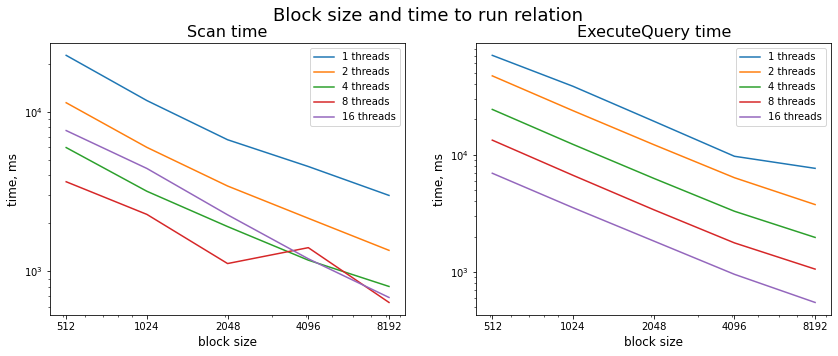

In [53]:
block_size_to_time_relation('log_round_robin.csv')

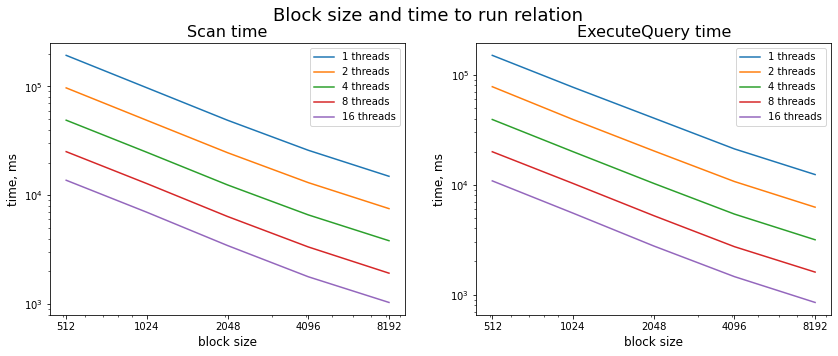

In [59]:
block_size_to_time_relation('log_one_disk.csv')

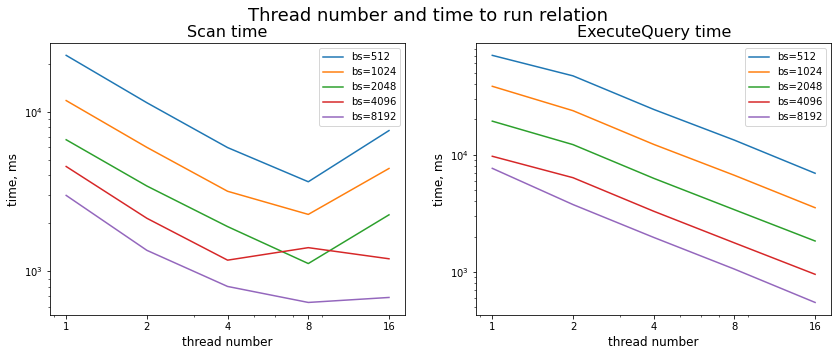

In [54]:
thread_number_to_time_relation('log_round_robin.csv')

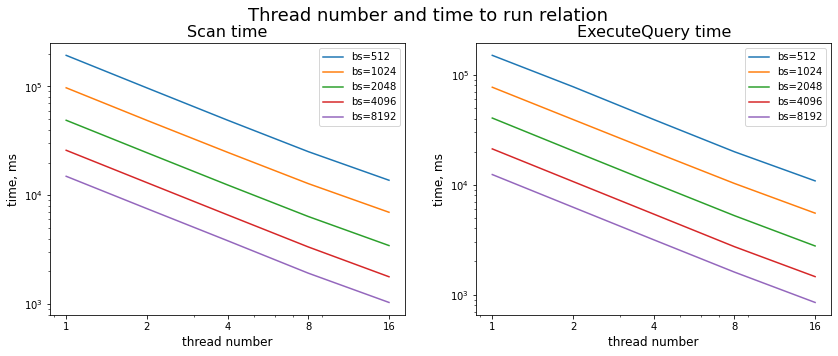

In [60]:
thread_number_to_time_relation('log_one_disk.csv')

Text(0, 0.5, 'execute_query time / scan time')

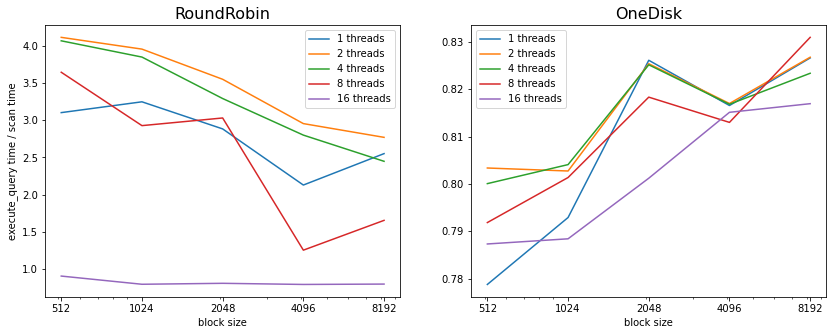

In [61]:
rr, rr_main, block_sizes, thread_numbers = main_info('log_round_robin.csv')
od, od_main, block_sizes, thread_numbers = main_info('log_one_disk.csv')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
for thread_number in thread_numbers:
    rr_bs = rr_main[rr_main['scan thread number'] == thread_number].groupby('block_size').mean()
    od_bs = od_main[od_main['scan thread number'] == thread_number].groupby('block_size').mean()
    ax[0].plot(rr_bs['execute_query time'] / rr_bs['scan time'], label='{} threads'.format(thread_number))
    ax[1].plot(od_bs['execute_query time'] / od_bs['scan time'], label='{} threads'.format(thread_number))
    

ax[0].legend()
ax[1].legend()
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlabel('block size')
ax[1].set_xlabel('block size')

ax[0].set_xticks(block_sizes)
ax[0].set_xticklabels([str(block_size) for block_size in block_sizes])
ax[1].set_xticks(block_sizes)
ax[1].set_xticklabels([str(block_size) for block_size in block_sizes])
ax[0].set_title('RoundRobin', fontsize=16)
ax[1].set_title('OneDisk', fontsize=16)
ax[0].set_ylabel('execute_query time / scan time')